# AirBnB Berlin EDA
Use `pandas` to analyze [AirBnB Berlin dataset](https://www.kaggle.com/brittabettendorf/berlin-airbnb-data) dataset.

In [64]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Load the Datasets

In [11]:
# load the dataset
listings = pd.read_csv('./data/listings.csv')
listings_summary = pd.read_csv('./data/listings_summary.csv')
reviews = pd.read_csv('./data/reviews.csv')
neighborhoods = pd.read_csv('./data/neighbourhoods.csv')
reviews_summary = pd.read_csv('./data/reviews_summary.csv')
calendar_summary = pd.read_csv('./data/calendar_summary.csv')

In [17]:
listings.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0


In [31]:
listings_summary.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76


In [13]:
neighborhoods.head()

,neighbourhood_group,neighbourhood
0,Charlottenburg-Wilm.,Barstraße
1,Charlottenburg-Wilm.,Charlottenburg Nord
2,Charlottenburg-Wilm.,Düsseldorfer Straße
3,Charlottenburg-Wilm.,Forst Grunewald
4,Charlottenburg-Wilm.,Grunewald


In [14]:
reviews_summary.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2015,69544350,2016-04-11,7178145,Rahel,Mein Freund und ich hatten gute gemütliche vie...
1,2015,69990732,2016-04-15,41944715,Hannah,Jan was very friendly and welcoming host! The ...
2,2015,71605267,2016-04-26,30048708,Victor,Un appartement tres bien situé dans un quartie...
3,2015,73819566,2016-05-10,63697857,Judy,"It is really nice area, food, park, transport ..."
4,2015,74293504,2016-05-14,10414887,Romina,"Buena ubicación, el departamento no está orden..."


In [40]:
calendar_summary.head()

,listing_id,date,available,price
0,2015,2019-09-10,f,NaN
1,2015,2019-09-09,f,NaN
2,2015,2019-09-08,f,NaN
3,2015,2019-09-07,f,NaN
4,2015,2019-09-06,f,NaN


## Questions

`1` How many unique listings are there in Berlin?

In [22]:
# use nunique to count the number of unique listing ids
unique_listings = listings.id.nunique()
print('There are {} unique listings in Berlin.'.format(unique_listings))

There are 22552 unique listings in Berlin.


`2` a. How many listings are there in each neighbourhood group?

In [30]:
# group by neighborhoodgroup
listings_per_neighborhood = listings.groupby(by=['neighbourhood_group'])[['id']].count()\
.rename(columns={'id':'count_listings'}) # rename the column

listings_per_neighborhood

,count_listings
neighbourhood_group,
Charlottenburg-Wilm.,1592
Friedrichshain-Kreuzberg,5497
Lichtenberg,688
Marzahn - Hellersdorf,141
Mitte,4631
Neukölln,3499
Pankow,3541
Reinickendorf,247
Spandau,124


b. Get the top-5  neighborhood groups by the number of listings?

In [28]:
# sort by count of listings
# take top 5
neighborhood_sorted = listings_per_neighborhood.sort_values(by=['count_listings'], ascending=False).head(5)

neighborhood_sorted

,count_listings
neighbourhood_group,
Friedrichshain-Kreuzberg,5497
Mitte,4631
Pankow,3541
Neukölln,3499
Charlottenburg-Wilm.,1592


c. Get the bottom-5  neighborhood groups by the number of listings?

In [29]:
# sort by count of listings
# take bottom 5
neighborhood_sorted_bottom = listings_per_neighborhood.sort_values(by=['count_listings'], ascending=False).tail(5)

neighborhood_sorted_bottom

,count_listings
neighbourhood_group,
Treptow - Köpenick,595
Steglitz - Zehlendorf,437
Reinickendorf,247
Marzahn - Hellersdorf,141
Spandau,124


`3` Get the number of listings per property type

In [36]:
# use value_counts to get the number of listings per property type already sorted
listings_summary.property_type.value_counts()

Apartment                 20225
Condominium                 612
Loft                        460
House                       398
Serviced apartment          175
Hostel                      128
Townhouse                    99
Guest suite                  74
Bed and breakfast            64
Guesthouse                   57
Hotel                        50
Other                        47
Boutique hotel               43
Bungalow                     20
Boat                         17
Tiny house                   12
Houseboat                    11
Camper/RV                    11
Villa                        10
Aparthotel                    7
Pension (South Korea)         7
Cabin                         6
Cottage                       4
Resort                        3
Train                         2
Castle                        2
Casa particular (Cuba)        2
Island                        1
Barn                          1
Chalet                        1
Cave                          1
In-law  

`4` Find the number of reviews for `Apartment` property type in `2018`?

In [41]:
# merge the datasets on listing id
merge = listings_summary.merge(reviews_summary, left_on='id', right_on='listing_id')

In [49]:
# create a new column with the year of the review
merge[['year', 'month', 'day']] = merge.date.str.split('-', expand=True)

In [57]:
# group by the year, find the count and take values for the 2019
merge = merge[merge.property_type == 'Apartment'].groupby(by=['year']).count().reset_index()

In [63]:
# get the number of reviews in 2018
merge[merge.year=='2018'][['year', 'id_x']].rename(columns={'id_x':'reviews_per_year'})

,year,reviews_per_year
9,2018,131409


`5` Sort the neighbourhood groups by the average price of the listing (from the most expensive to least expensive) using the `listings` table

In [78]:
# group the listings by neighbourhood and find average
listing_avg_price_nei = listings.groupby(by=['neighbourhood_group'])[['price']].mean()\
.sort_values(by=['price'], ascending=False) # sort by price in descending order
listing_avg_price_nei

,price
neighbourhood_group,
Charlottenburg-Wilm.,114.270729
Tempelhof - Schöneberg,96.572436
Mitte,69.699417
Pankow,67.822649
Friedrichshain-Kreuzberg,60.828816
Spandau,58.233871
Marzahn - Hellersdorf,56.503546
Steglitz - Zehlendorf,56.327231
Lichtenberg,56.113372


`6` Get the average number of available listings for each month in 2019 (get the number of available listings for each day and find the monthly average value for each month in 2019)

In [97]:
# create a copy of the dataframe
calendar_clean = calendar_summary.copy()
# create a separate column with 1 when the listing is available
# and 0 when the listing is not available
calendar_clean['av'] = calendar_clean.apply(lambda row: 1 if row.available == 't' else 0, axis =1)

In [105]:
# group by date and sum
av_per_day = calendar_clean.groupby(by=['date'])[['date','av']].sum().reset_index()

In [106]:
# extract year, month and day
av_per_day[['year', 'month', 'day']] = av_per_day.date.str.split('-', expand=True)

In [112]:
# filter by the year,
# group by month and take the mean
listings_month_avg = av_per_day[av_per_day.year == '2019'].groupby(by='month').mean().reset_index()

listings_month_avg

,month,av
0,01,6323.806452
1,02,5503.357143
2,03,5463.516129
3,04,5660.366667
4,05,4701.258065
5,06,4471.566667
6,07,4655.387097
7,08,4605.741935
8,09,4698.266667
9,10,4795.903226


`7` Get the average listing price for each month in 2019 (use `calendar_summary` table and intermediate results from the previous question)

In [127]:
# take intermediate results and remove the rows with missing values
calendar_clean_gf = calendar_clean.dropna()

In [128]:
# clean the price column (remove $ and translate from str to float)
calendar_clean_gf['price_cleaned'] = calendar_clean_gf.apply(lambda row: 0 if row.price == 0 else float(row.price[1:].replace(',', '')),\
                                                             axis =1)

/Users/aleksandraastakhova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [131]:
# extract year, month and day
calendar_clean_gf[['year', 'month', 'day']] = calendar_clean_gf.date.str.split('-', expand=True)

In [134]:
# filter by year, group by month and take the average value
price_month_avg = calendar_clean_gf[calendar_clean_gf.year == '2019'].groupby(by='month').mean().reset_index()\
[['month', 'price_cleaned']]

price_month_avg

,month,price_cleaned
0,01,82.292882
1,02,84.603430
2,03,85.811819
3,04,85.786156
4,05,87.089317
5,06,88.689527
6,07,84.842118
7,08,84.718640
8,09,83.683628
9,10,81.898516


## Diagrams

Use the data extracted above for some diagrams:

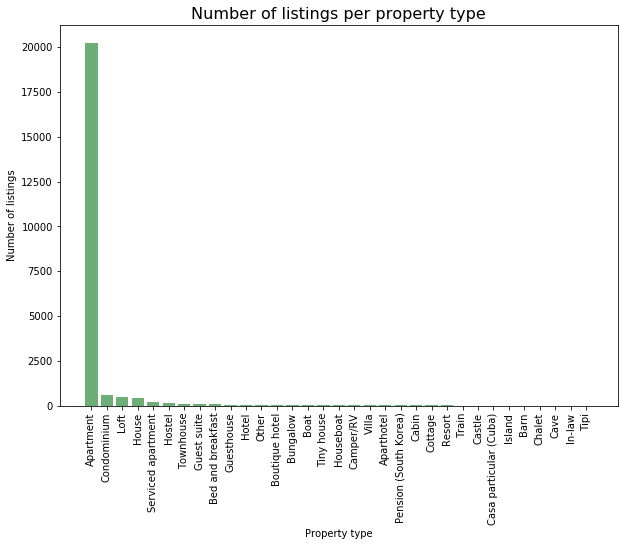

In [88]:
plt.figure(figsize=(10,7))
plt.bar(range(0, len(listings_summary.property_type.value_counts().values)), 
        listings_summary.property_type.value_counts().values, color='#6cae75')
plt.xticks(range(0, len(listings_summary.property_type.value_counts().values)), 
           listings_summary.property_type.value_counts().index, rotation=90)

plt.title('Number of listings per property type', fontsize=16)
plt.xlabel('Property type')
plt.ylabel('Number of listings')
plt.show()

In [79]:
listing_avg_price_nei = listing_avg_price_nei.reset_index()

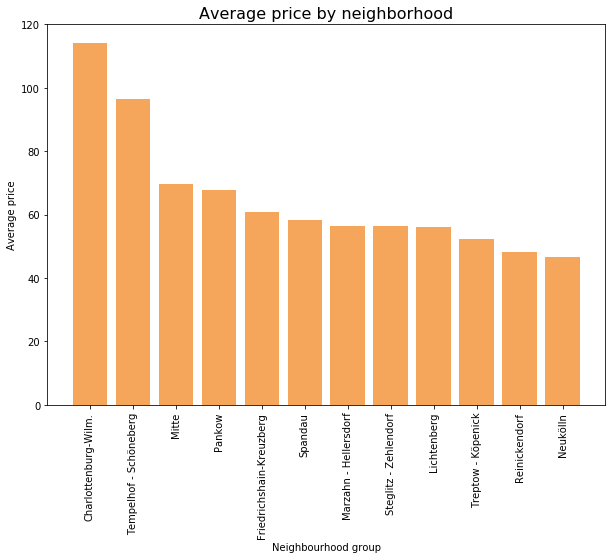

In [85]:
plt.figure(figsize=(10,7))
plt.bar(range(0, len(listing_avg_price_nei)), 
        listing_avg_price_nei.price.values, color='#f5a65b')
plt.xticks(range(0, len(listing_avg_price_nei)), 
           listing_avg_price_nei.neighbourhood_group.values, rotation=90)

plt.title('Average price by neighborhood', fontsize=16)
plt.xlabel('Neighbourhood group')
plt.ylabel('Average price')
plt.show()

In [113]:
listings_month_avg

,month,av
0,01,6323.806452
1,02,5503.357143
2,03,5463.516129
3,04,5660.366667
4,05,4701.258065
5,06,4471.566667
6,07,4655.387097
7,08,4605.741935
8,09,4698.266667
9,10,4795.903226


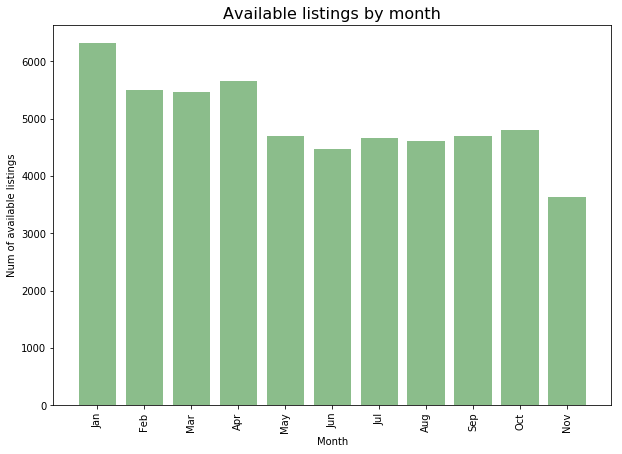

In [135]:
plt.figure(figsize=(10,7))
plt.bar(range(0, len(listings_month_avg)), 
        listings_month_avg.av.values, color='#8BBD8B')
plt.xticks(range(0, len(listings_month_avg)), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', "Jun", 'Jul', 'Aug', 'Sep', 'Oct', 'Nov'], rotation=90)

plt.title('Available listings by month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Num of available listings')
plt.show()

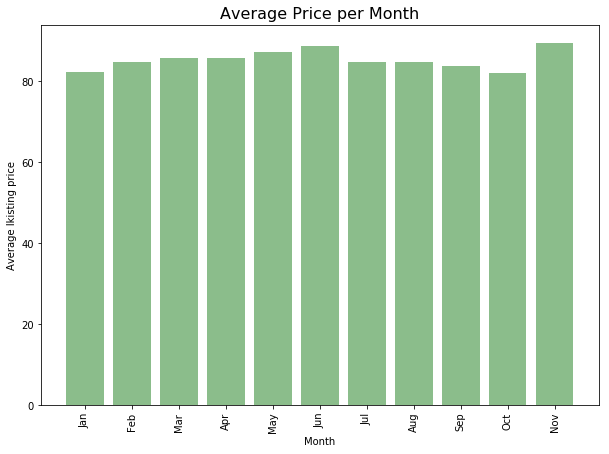

In [137]:
plt.figure(figsize=(10,7))
plt.bar(range(0, len(listings_month_avg)), 
        price_month_avg.price_cleaned.values, color='#8BBD8B')
plt.xticks(range(0, len(listings_month_avg)), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', "Jun", 'Jul', 'Aug', 'Sep', 'Oct', 'Nov'], rotation=90)

plt.title('Average Price per Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Average lkisting price')
plt.show()

__Makes sense that in months with the lowest number of available listings we see the hightest prices.__